In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("results.csv")

In [4]:
df.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'],
      dtype='object')

In [5]:
df1 = df[["grid","positionOrder","raceId","constructorId"]]

In [6]:
df_clear = df1[df1["raceId"] > 900]

In [7]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4604 entries, 22149 to 26758
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   grid           4604 non-null   int64
 1   positionOrder  4604 non-null   int64
 2   raceId         4604 non-null   int64
 3   constructorId  4604 non-null   int64
dtypes: int64(4)
memory usage: 179.8 KB


In [8]:
X = df_clear[["grid"]]
y = df_clear[["positionOrder"]]

In [9]:
df_clear.shape

(4604, 4)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.pipeline import Pipeline

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=33)

In [12]:
regression = LinearRegression()
scaler = StandardScaler()

In [13]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
regression.fit(X_train,y_train)

LinearRegression()

In [15]:
y_pred = regression.predict(X_test)

In [16]:
score = r2_score(y_test,y_pred)
print(score)

0.3261445041918781


In [17]:
poly = PolynomialFeatures(degree=2,include_bias=True)

In [18]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [19]:
regression = LinearRegression()
regression.fit(X_train_poly,y_train)

LinearRegression()

In [20]:
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test,y_pred)
print(score)

0.33235503323164217


In [21]:
poly = PolynomialFeatures(degree=3,include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [22]:
regression = LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test,y_pred)
print(score)

0.34286207042873273


In [23]:
X_new = df_clear[["grid"]]
X_new = scaler.transform(X_new)
X_new_poly = poly.transform(X_new)
y_new = regression.predict(X_new_poly)

def poly_regression(degree):
    poly_features = PolynomialFeatures(degree=degree)
    lin_reg = LinearRegression()
    scaler = StandardScaler()
    pipeline = Pipeline([
        ("standard_scaler", scaler),
        ("poly_features", poly_features),
        ("lin_reg", lin_reg)
    ])
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    print("R2 score: ", score)

    y_pred_new = pipeline.predict(X_new)
    plt.plot(X_new, y_pred_new, "r", label="New Predictions")
    plt.scatter(X_train, y_train, label="Training Points")
    plt.scatter(X_test, y_test, label="Test Points")
    plt.legend()
    plt.show()

R2 score:  0.3261445041918781


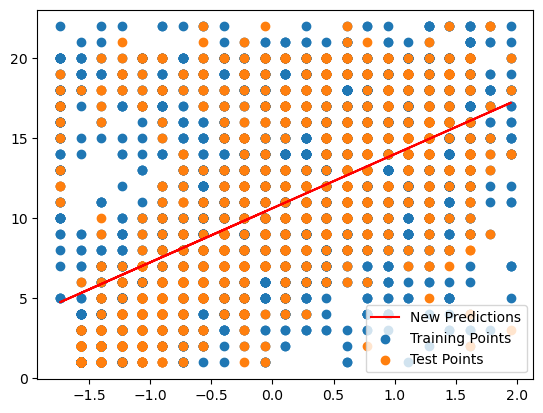

R2 score:  0.33235503323164206


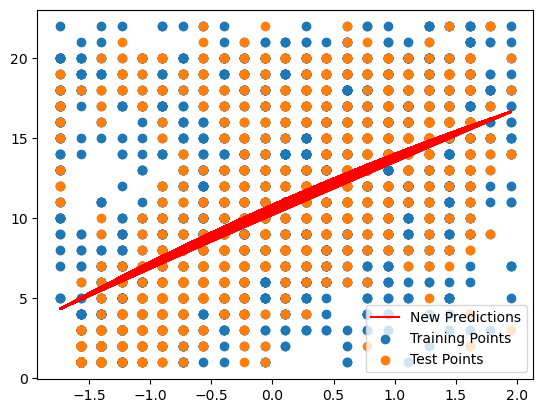

R2 score:  0.34286207042873296


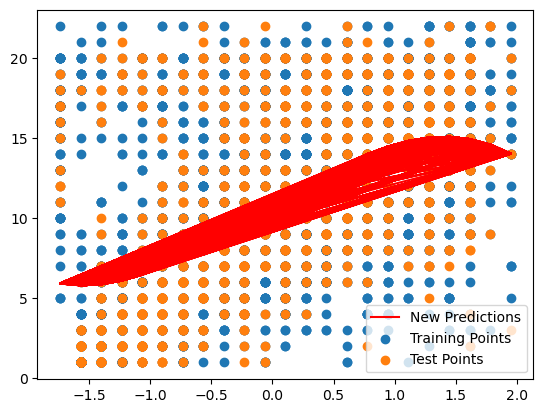

R2 score:  0.3484212681711244


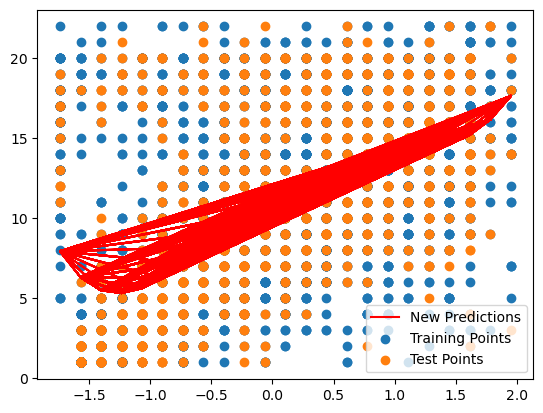

R2 score:  0.34935155116189753


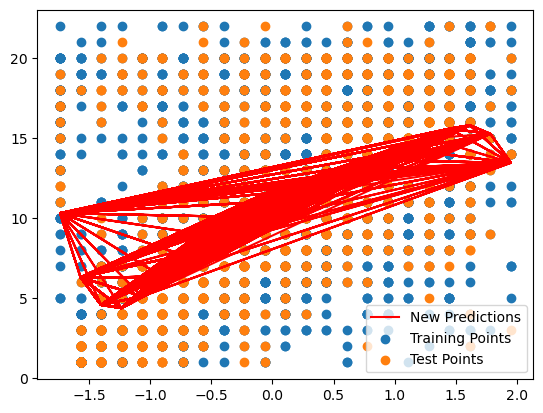

R2 score:  0.35645490251159606


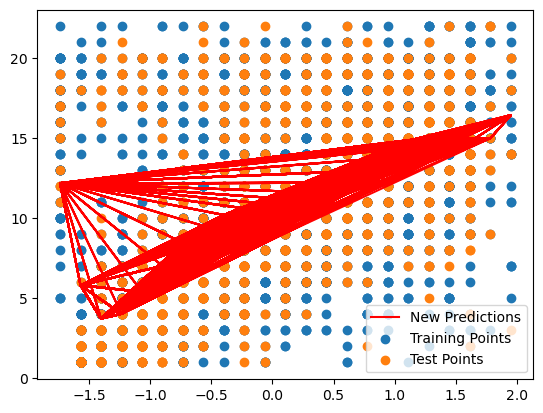

R2 score:  0.36547249839937723


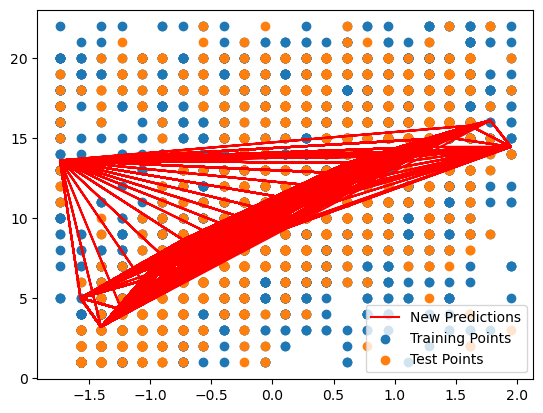

R2 score:  0.3736644210754795


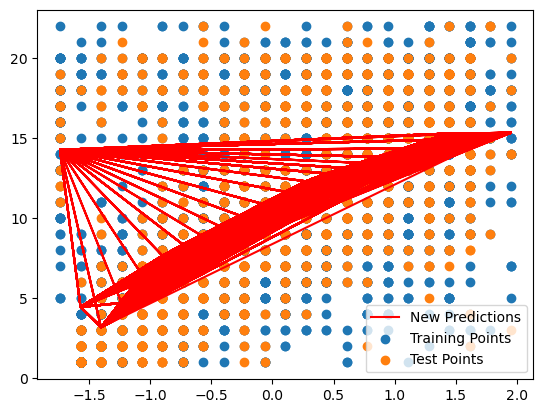

R2 score:  0.37848235151978493


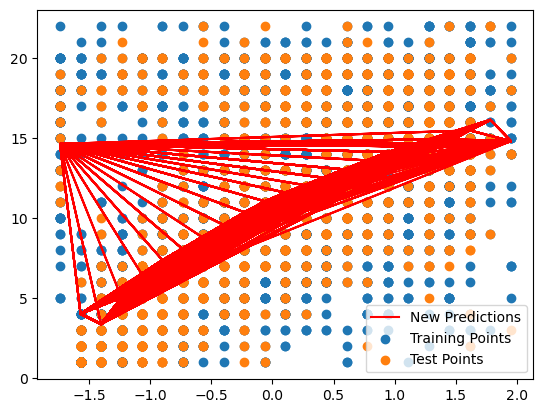

R2 score:  0.3802531167947807


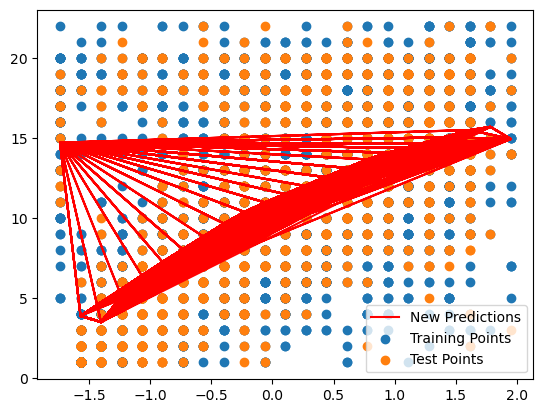

In [76]:
for degree in [1,2,3,4,5,6,7,8,9,10]:
    poly_regression(degree)

R2 score:  0.3484212681711244


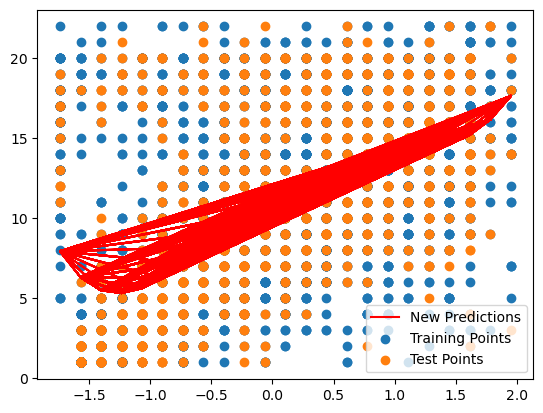

In [24]:
poly_regression(4)